In [1]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  # converting job_posted_date to datetime object
df['job_skills'] = df['job_skills'].apply(lambda data: ast.literal_eval(data) if pd.notna(data) else data)  # converting job_skills to list

In [2]:
job_title = 'Data Analyst'
df_DA = df[df['job_title'] == job_title].copy()

In [4]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
# df_DA

In [5]:
df_DA_explode = df_DA.explode('job_skills')
df_DA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785644,Data Analyst,Data Analyst,"Las Condes, Chile","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Chile,2023-08-20 06:29:50,True,False,Chile,None,NaN,NaN,Worldgroup Careers MWT,r,"{'analyst_tools': ['power bi'], 'cloud': ['sno...",8
785644,Data Analyst,Data Analyst,"Las Condes, Chile","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Chile,2023-08-20 06:29:50,True,False,Chile,None,NaN,NaN,Worldgroup Careers MWT,snowflake,"{'analyst_tools': ['power bi'], 'cloud': ['sno...",8
785644,Data Analyst,Data Analyst,"Las Condes, Chile","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Chile,2023-08-20 06:29:50,True,False,Chile,None,NaN,NaN,Worldgroup Careers MWT,power bi,"{'analyst_tools': ['power bi'], 'cloud': ['sno...",8
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",sql,"{'analyst_tools': ['excel'], 'programming': ['...",7


In [14]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,chainer,debian,pascal,mxnet,next.js,nuix,suse,svelte,twilio,wsl
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2916,1820,1641,1474,1114,851,912,305,325,290,...,0,1,0,0,0,0,0,0,0,0
2,1972,1233,1140,965,805,589,580,255,229,212,...,0,0,0,0,0,0,0,0,0,1
3,1952,1243,1115,1022,808,586,556,204,221,222,...,0,0,0,0,0,0,1,0,0,0
4,1934,1222,1129,960,753,579,512,195,215,235,...,0,0,0,0,0,0,0,0,0,0
5,1844,1135,1057,886,720,558,400,183,196,167,...,0,0,0,0,0,0,0,0,0,0
6,2000,1238,1185,994,869,629,504,208,211,225,...,0,0,0,0,0,0,0,0,0,0
7,1891,1207,1142,944,773,608,454,192,194,194,...,0,0,1,0,1,0,0,0,0,0
8,2306,1537,1398,1209,1032,747,570,234,225,211,...,0,0,0,0,0,0,0,0,0,0
9,1767,1138,1041,883,808,521,426,183,127,132,...,0,0,0,0,0,1,0,0,0,0


In [16]:
trending_skills_final = df_DA_pivot.iloc[:, :5]
trending_skills_final

job_skills,sql,excel,python,tableau,power bi
job_posted_month_no,,,,,
1,2916,1820,1641,1474,1114
2,1972,1233,1140,965,805
3,1952,1243,1115,1022,808
4,1934,1222,1129,960,753
5,1844,1135,1057,886,720
6,2000,1238,1185,994,869
7,1891,1207,1142,944,773
8,2306,1537,1398,1209,1032
9,1767,1138,1041,883,808


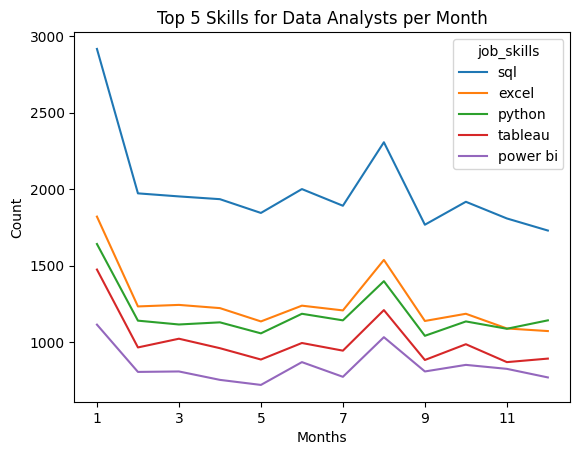

In [19]:
trending_skills_final.plot(kind='line')
plt.title(f'Top 5 Skills for {job_title}s per Month')
plt.ylabel('Count')
plt.xlabel('Months')
plt.show()